In [3]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

In [8]:
image_color = cv.imread("img.jpg")
image = cv.cvtColor(image_color,cv.COLOR_BGR2GRAY)

In [9]:
image = cv.GaussianBlur(image, (5, 5), 0)

In [31]:
desentx = cv.Sobel(image,cv.CV_64F,1,0)
desenty = cv.Sobel(image,cv.CV_64F,0,1)
#desent = cv.addWeighted(desentx,0.5,desenty,0.5,0)
desent = np.sqrt(desentx**2+desenty**2)

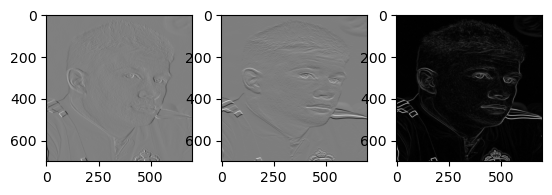

In [32]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(desentx,plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(desenty,plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(desent,plt.cm.gray)

In [33]:
desent_theta = np.arctan2(desenty,desentx)
print(desent_theta)

[[ 0.          0.          0.         ...  0.          3.14159265
   0.        ]
 [ 1.57079633  0.46364761  0.19739556 ...  0.32175055  2.35619449
   1.57079633]
 [ 1.57079633  0.78539816  0.32175055 ...  0.19739556  1.57079633
   1.57079633]
 ...
 [ 0.          0.          0.         ... -1.57079633 -1.24904577
  -1.57079633]
 [ 0.          0.          0.         ... -2.35619449 -1.10714872
  -1.57079633]
 [ 0.          0.          0.         ...  3.14159265  0.
   0.        ]]


In [34]:
def NMS(arr,i,j,dir):
    maxi,maxj = arr.shape
    if dir > 3*np.pi/8 or dir < -3*np.pi/8:
        dx,dy = [1,-1],[0,0]
    elif dir > np.pi/8:
        dx,dy = [1,-1],[1,-1]
    elif dir > -np.pi/8:
        dx,dy = [0,0],[1,-1]
    else:
        dx,dy = [1,-1],[-1,1]
    for k in range(2):
        newx,newy = i+dx[k],j+dy[k]
        if newx > -1 and newx < maxi and newy > -1 and newy < maxj:
            if arr[newx,newy] > arr[i][j]:
                return True
    return False

In [35]:
height,width = image.shape
thlow = 10
thhigh = 50
mask = np.zeros(image.shape)
dx = [-1,-1,-1,0,0,1,1,1]
dy = [1,0,-1,1,-1,1,0,-1]
for i in range(height):
        for j in range(width):
            if desent[i,j] < thhigh:
                desent[i,j] = 0
                continue
            else:
                if NMS(desent,i,j,desent_theta[i,j]):
                    desent[i,j] = 0
                elif desent[i,j] > thlow:
                    mask[i,j] = desent[i,j]
for i in range(height):
        for j in range(width):  
            if desent[i,j] > thhigh and desent[i,j] < thlow:
                for k in range(8):
                    newx,newy = i+dx[k],j+dy[k]
                    if newx > -1 and newx < height and newy > -1 and newy < width:
                        if mask[newx,newy]:
                            mask[i,j] = desent[i,j]
                            break

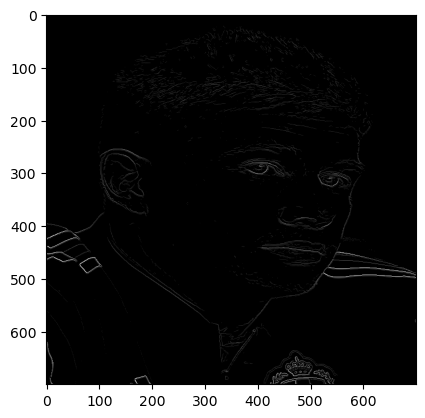

In [36]:
plt.figure()
plt.imshow(mask,plt.cm.gray)